# Create dataset: Highest vs rest (high, medium, low, lowest)
* Under sampling the majority class.
* 50/50 balance per class. 

In [1]:
file_path = '/fp/projects01/ec307/ec-krimhau/jira_datasets'
file_name = 'jira_clean_with_all_cols.csv'
full_path = f"{file_path}/{file_name}"

In [2]:
import pandas as pd
# Import csv file
df = pd.read_csv(full_path)
df

,priority,description,project,labels,issuetype,collection,class,text_str,text_clean
0,Blocker,We tried upgrading from Spring Boot 2.0.6 to S...,Spring XD,[],Bug,Spring,Highest,We tried upgrading from Spring Boot 2.0.6 to S...,we tried upgrading from spring boot to spring ...
1,Major,The jobs that appear under Executions section ...,Spring XD,[],Bug,Spring,Medium,The jobs that appear under Executions section ...,the jobs that appear under executions section ...
2,Trivial,Working with Spring-XD version 1.3.2.RELEASE\n...,Spring XD,[],Bug,Spring,Lowest,Working with Spring-XD version 1.3.2.RELEASE\n...,working with springxd version the server with ...
3,Major,My project 7 node cluster and in that 2 node a...,Spring XD,"['Spring', 'xd']",Bug,Spring,Medium,My project 7 node cluster and in that 2 node a...,my project node cluster and in that node are a...
4,Minor,See https://github.com/spring-projects/spring-...,Spring XD,[],Story,Spring,Low,See https://github.com/spring-projects/spring-...,NaN
...,...,...,...,...,...,...,...,...,...
1404240,Major,it is very beautiful.,Community Support - Open Source Project Reposi...,[],New Project,Sonatype,Medium,it is very beautiful.,it is very beautiful
1404241,Major,library,Community Support - Open Source Project Reposi...,[],New Project,Sonatype,Medium,library,NaN
1404242,Major,What is reactive-gremlin\r\n\r\nreactive-greml...,Community Support - Open Source Project Reposi...,[],New Project,Sonatype,Medium,What is reactive-gremlin\r\n\r\nreactive-greml...,what is reactivegremlin reactivegremlin is a s...
1404243,Major,"Android view for a swipeable, weekly calendar.",Community Support - Open Source Project Reposi...,[],New Project,Sonatype,Medium,"Android view for a swipeable, weekly calendar.",android view for a swipeable weekly calendar


In [3]:
# Count class
df['class'].value_counts().to_frame()

,count
class,
Medium,960459
Low,271629
High,82646
Highest,56220
Lowest,33291


In [4]:
# NaN values
df.isnull().sum()

priority           0
description        0
project            0
labels             0
issuetype          0
collection         0
class              0
text_str           0
text_clean     34264
dtype: int64

In [5]:
# Drop NaN values
df = df.dropna()
df.isnull().sum()

priority       0
description    0
project        0
labels         0
issuetype      0
collection     0
class          0
text_str       0
text_clean     0
dtype: int64

In [6]:
# Rename 'old_name' to 'new_name'
df.rename(columns={'text_clean': 'text'}, inplace=True)
df

/localscratch/494353/ipykernel_2442911/2716090924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'text_clean': 'text'}, inplace=True)


,priority,description,project,labels,issuetype,collection,class,text_str,text
0,Blocker,We tried upgrading from Spring Boot 2.0.6 to S...,Spring XD,[],Bug,Spring,Highest,We tried upgrading from Spring Boot 2.0.6 to S...,we tried upgrading from spring boot to spring ...
1,Major,The jobs that appear under Executions section ...,Spring XD,[],Bug,Spring,Medium,The jobs that appear under Executions section ...,the jobs that appear under executions section ...
2,Trivial,Working with Spring-XD version 1.3.2.RELEASE\n...,Spring XD,[],Bug,Spring,Lowest,Working with Spring-XD version 1.3.2.RELEASE\n...,working with springxd version the server with ...
3,Major,My project 7 node cluster and in that 2 node a...,Spring XD,"['Spring', 'xd']",Bug,Spring,Medium,My project 7 node cluster and in that 2 node a...,my project node cluster and in that node are a...
5,Major,I'm trying to run a Job on SpringXD and the jo...,Spring XD,[],Bug,Spring,Medium,I'm trying to run a Job on SpringXD and the jo...,im trying to run a job on springxd and the job...
...,...,...,...,...,...,...,...,...,...
1404239,Major,Simple android lib for pushing little messages...,Community Support - Open Source Project Reposi...,[],New Project,Sonatype,Medium,Simple android lib for pushing little messages...,simple android lib for pushing little messages...
1404240,Major,it is very beautiful.,Community Support - Open Source Project Reposi...,[],New Project,Sonatype,Medium,it is very beautiful.,it is very beautiful
1404242,Major,What is reactive-gremlin\r\n\r\nreactive-greml...,Community Support - Open Source Project Reposi...,[],New Project,Sonatype,Medium,What is reactive-gremlin\r\n\r\nreactive-greml...,what is reactivegremlin reactivegremlin is a s...
1404243,Major,"Android view for a swipeable, weekly calendar.",Community Support - Open Source Project Reposi...,[],New Project,Sonatype,Medium,"Android view for a swipeable, weekly calendar.",android view for a swipeable weekly calendar


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'text' column to string
df.loc[:, 'text'] = df['text'].astype(str)

# Create a new column 'issue_length' based on the length of 'text'
df.loc[:, 'issue_length'] = df['text'].apply(len)

/localscratch/494353/ipykernel_2442911/3685798275.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'issue_length'] = df['text'].apply(len)


In [8]:
# Calculate summary statistics for issue lengths
summary_stats = df['issue_length'].describe()

percentile_25th = int(summary_stats['25%'])
print(percentile_25th)
# Format and print the summary statistics for better readability
print("Issue Lengths Summary Statistics:")
print(f"Number of issues: {summary_stats['count']:.0f}")
print(f"Mean: {summary_stats['mean']:.2f} characters")
print(f"Standard Deviation: {summary_stats['std']:.2f} characters")
print(f"Minimum Length: {summary_stats['min']:.0f} characters")
print(f"25th Percentile: {summary_stats['25%']:.0f} characters")
print(f"Median (50th Percentile): {summary_stats['50%']:.0f} characters")
print(f"75th Percentile: {summary_stats['75%']:.0f} characters")
print(f"Maximum Length: {summary_stats['max']:.0f} characters")

149
Issue Lengths Summary Statistics:
Number of issues: 1369981
Mean: 530.42 characters
Standard Deviation: 3850.46 characters
Minimum Length: 1 characters
25th Percentile: 149 characters
Median (50th Percentile): 294 characters
75th Percentile: 557 characters
Maximum Length: 2281081 characters


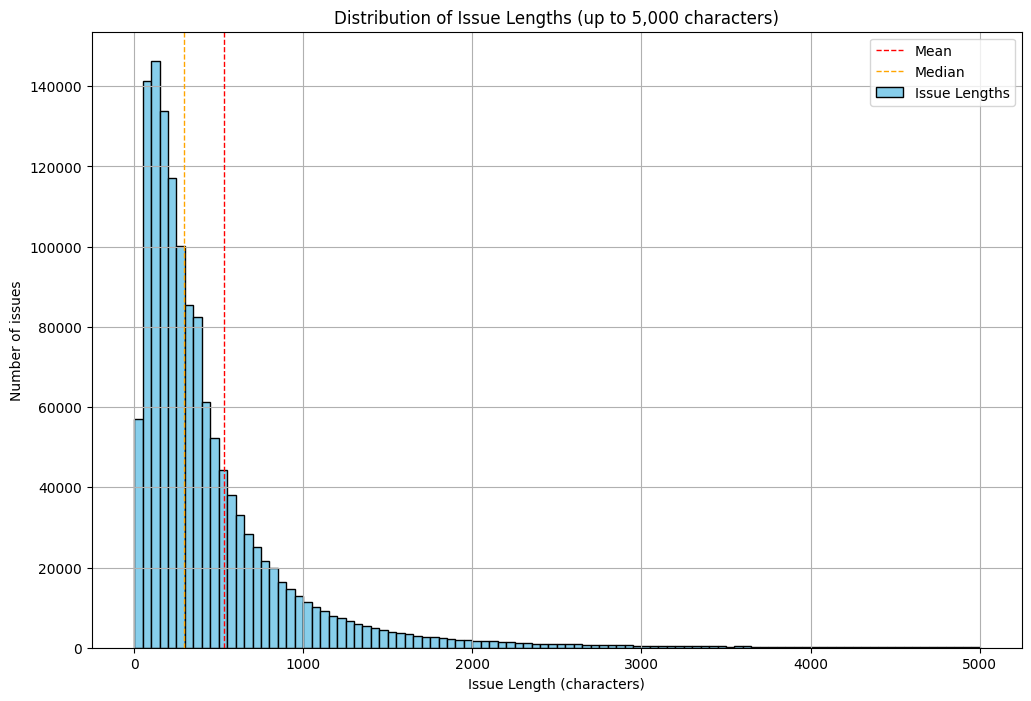

In [9]:
import matplotlib.pyplot as plt

# Plotting the distribution of issue lengths with updated parameters
plt.figure(figsize=(12, 8))
plt.hist(df['issue_length'], bins=100, color='skyblue', edgecolor='black', range=[0, 5000])
plt.title('Distribution of Issue Lengths (up to 5,000 characters)')
plt.xlabel('Issue Length (characters)')
plt.ylabel('Number of issues')
plt.axvline(df['issue_length'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(df['issue_length'].median(), color='orange', linestyle='dashed', linewidth=1)
plt.legend(['Mean', 'Median', 'Issue Lengths'])
plt.grid(True)

# Show the plot
plt.show()


In [10]:
# Remove the 25th percentile (199) chars a small length issues
befor_len = len(df)
df = df[df['issue_length'] >= percentile_25th]
df.reset_index(drop=True, inplace=True)
after_len = len(df)
diff = befor_len - after_len
print(f"Before: {befor_len}. After: {after_len}. Issues removed: {diff}")
df

Before: 1369981. After: 1028415. Issues removed: 341566


,priority,description,project,labels,issuetype,collection,class,text_str,text,issue_length
0,Blocker,We tried upgrading from Spring Boot 2.0.6 to S...,Spring XD,[],Bug,Spring,Highest,We tried upgrading from Spring Boot 2.0.6 to S...,we tried upgrading from spring boot to spring ...,1971
1,Trivial,Working with Spring-XD version 1.3.2.RELEASE\n...,Spring XD,[],Bug,Spring,Lowest,Working with Spring-XD version 1.3.2.RELEASE\n...,working with springxd version the server with ...,693
2,Major,My project 7 node cluster and in that 2 node a...,Spring XD,"['Spring', 'xd']",Bug,Spring,Medium,My project 7 node cluster and in that 2 node a...,my project node cluster and in that node are a...,523
3,Major,I'm trying to run a Job on SpringXD and the jo...,Spring XD,[],Bug,Spring,Medium,I'm trying to run a Job on SpringXD and the jo...,im trying to run a job on springxd and the job...,910
4,Major,"Hello,\n\nI have encountered following problem...",Spring XD,[],Bug,Spring,Medium,"Hello,\n\nI have encountered following problem...",helloi have encountered following problem whil...,1614
...,...,...,...,...,...,...,...,...,...,...
1028410,Major,"Hello, I requested a new group via OSSRH-25368...",Community Support - Open Source Project Reposi...,[],Publishing Support,Sonatype,Medium,"Hello, I requested a new group via OSSRH-25368...",hello i requested a new group via it was creat...,567
1028411,Major,It is simple lib for start UI version of conso...,Community Support - Open Source Project Reposi...,[],New Project,Sonatype,Medium,It is simple lib for start UI version of conso...,it is simple lib for start ui version of conso...,157
1028412,Major,"I am the owner of gloups.org, and I would like...",Community Support - Open Source Project Reposi...,[],New Project,Sonatype,Medium,"I am the owner of gloups.org, and I would like...",i am the owner of gloupsorg and i would like t...,171
1028413,Major,MTM is a Swedish government agency for accessi...,Community Support - Open Source Project Reposi...,[],New Project,Sonatype,Medium,MTM is a Swedish government agency for accessi...,mtm is a swedish government agency for accessi...,224


In [11]:
# Calculate summary statistics for issue lengths
summary_stats = df['issue_length'].describe()

# Format and print the summary statistics for better readability
print("Issue Lengths Summary Statistics:")
print(f"Number of issues: {summary_stats['count']:.0f}")
print(f"Mean: {summary_stats['mean']:.2f} characters")
print(f"Standard Deviation: {summary_stats['std']:.2f} characters")
print(f"Minimum Length: {summary_stats['min']:.0f} characters")
print(f"25th Percentile: {summary_stats['25%']:.0f} characters")
print(f"Median (50th Percentile): {summary_stats['50%']:.0f} characters")
print(f"75th Percentile: {summary_stats['75%']:.0f} characters")
print(f"Maximum Length: {summary_stats['max']:.0f} characters")

Issue Lengths Summary Statistics:
Number of issues: 1028415
Mean: 677.11 characters
Standard Deviation: 4434.36 characters
Minimum Length: 149 characters
25th Percentile: 251 characters
Median (50th Percentile): 394 characters
75th Percentile: 685 characters
Maximum Length: 2281081 characters


In [12]:
# Count class
df['class'].value_counts().to_frame()

,count
class,
Medium,686083
Low,208051
High,67722
Highest,44778
Lowest,21781


In [13]:
# Unique collections
df['collection'].unique()

array(['Spring', 'RedHat', 'Sakai', 'JiraEcosystem', 'Hyperledger',
       'Apache', 'SecondLife', 'IntelDAOS', 'Mindville', 'Sonatype'],
      dtype=object)

In [15]:
# make df with class and text_clean
df = df[['class', 'text']]

In [16]:
highest = df[df['class'] == 'Highest']
highest["label"] = 1
highest["class_original"] = "Highest"
highest["class"] = "highest"
high = df[df['class'] == 'High']
medium = df[df['class'] == 'Medium']
low = df[df['class'] == 'Low']
lowest = df[df['class'] == 'Lowest']

/localscratch/494353/ipykernel_2442911/3737047461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highest["label"] = 1
/localscratch/494353/ipykernel_2442911/3737047461.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highest["class_original"] = "Highest"
/localscratch/494353/ipykernel_2442911/3737047461.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [17]:
# Concat all class except highest and high
rest = pd.concat([high, medium, low, lowest])
# Rename class to class_1
rest = rest.rename(columns={'class': 'class_original'})
rest["class"] = "rest" 
rest["label"] = 0
rest 

,class_original,text,class,label
5,High,according to the documentation we can load jar...,rest,0
35,High,xd container loose connection with zookeeperim...,rest,0
83,High,if i deploy more than one instance of a module...,rest,0
240,High,i am using the pox method to implement a simpl...,rest,0
262,High,when evaluating multiple marshallingmethodendp...,rest,0
...,...,...,...,...
1025470,Lowest,hi i am working with a team that is using matl...,rest,0
1025588,Lowest,i had to drop the repository and also the repo...,rest,0
1027361,Lowest,following dependencies are not yet ready i alr...,rest,0
1028074,Lowest,im releasing my artifacts for the first time i...,rest,0


In [18]:
# Value count rest class
rest['class_original'].value_counts().to_frame()

,count
class_original,
Medium,686083
Low,208051
High,67722
Lowest,21781


In [19]:
from sklearn.utils import shuffle
# Number of rows in the highest class
n_highest = highest.shape[0]

rest_sampled = rest.sample(n=n_highest, random_state=42)  


balanced_data = pd.concat([highest, rest_sampled])

# Shuffle the combined dataset
balanced_data = shuffle(balanced_data, random_state=42)
balanced_data


,class,text,label,class_original
323935,highest,codejava in importtestmodule mod selffspathpyi...,1,Highest
777707,rest,o the goal is move the add node delete node ad...,0,Low
725160,rest,fileformatwriterwrite will sort the partition ...,0,Medium
914881,highest,it would be nice to have the ability in mapred...,1,Highest
507079,highest,enable maker checker in go to systemconfigure ...,1,Highest
...,...,...,...,...
125155,highest,for jbide please perform the following make su...,1,Highest
336160,rest,the main idea to add a few strategies of index...,0,Medium
981253,rest,each partition has its own version number so t...,0,Medium
48380,highest,expected behavior jibmaven task published the ...,1,Highest


In [20]:
balanced_data['class'].value_counts().to_frame()

,count
class,
highest,44778
rest,44778


In [21]:
balanced_data

,class,text,label,class_original
323935,highest,codejava in importtestmodule mod selffspathpyi...,1,Highest
777707,rest,o the goal is move the add node delete node ad...,0,Low
725160,rest,fileformatwriterwrite will sort the partition ...,0,Medium
914881,highest,it would be nice to have the ability in mapred...,1,Highest
507079,highest,enable maker checker in go to systemconfigure ...,1,Highest
...,...,...,...,...
125155,highest,for jbide please perform the following make su...,1,Highest
336160,rest,the main idea to add a few strategies of index...,0,Medium
981253,rest,each partition has its own version number so t...,0,Medium
48380,highest,expected behavior jibmaven task published the ...,1,Highest


In [22]:
# Count label
balanced_data['label'].value_counts().to_frame()

,count
label,
1,44778
0,44778


In [23]:
# Count original class
balanced_data['class_original'].value_counts().to_frame()

,count
class_original,
Highest,44778
Medium,31159
Low,9487
High,3133
Lowest,999


In [24]:
balanced_data = balanced_data[['label', 'text']]

balanced_data

,label,text
323935,1,codejava in importtestmodule mod selffspathpyi...
777707,0,o the goal is move the add node delete node ad...
725160,0,fileformatwriterwrite will sort the partition ...
914881,1,it would be nice to have the ability in mapred...
507079,1,enable maker checker in go to systemconfigure ...
...,...,...
125155,1,for jbide please perform the following make su...
336160,0,the main idea to add a few strategies of index...
981253,0,each partition has its own version number so t...
48380,1,expected behavior jibmaven task published the ...


In [25]:
out_path = '/fp/projects01/ec307/ec-krimhau/jira_datasets/highest_vs_rest_min_len_25th_balanced_jira.csv'

In [26]:
# Save to csv
balanced_data.to_csv(out_path, index=False)

In [27]:
# Read csv
df = pd.read_csv(out_path)

In [28]:
df

,label,text
0,1,codejava in importtestmodule mod selffspathpyi...
1,0,o the goal is move the add node delete node ad...
2,0,fileformatwriterwrite will sort the partition ...
3,1,it would be nice to have the ability in mapred...
4,1,enable maker checker in go to systemconfigure ...
...,...,...
89551,1,for jbide please perform the following make su...
89552,0,the main idea to add a few strategies of index...
89553,0,each partition has its own version number so t...
89554,1,expected behavior jibmaven task published the ...
